In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/balanced_data.csv')
data.drop(data.columns[0] , inplace=True , axis=1)

In [5]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df
# calling the normalization() function
data = normalization(data.copy(),numeric_col)
data.drop(['Label'],axis=1 , inplace=True)

In [6]:
data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.646799,0.324411,-1.948333,0.204423,2.428566,-0.662668,2.051947,-0.472445,-0.008076,-0.009102,...,-0.004708,0.002719,-0.128601,-0.097503,-0.146881,-0.106173,-0.39466,-0.121018,-0.40072,-0.38032
1,1.783219,0.430907,0.508829,0.114303,-0.421518,1.505849,-0.394452,-0.469837,-0.009562,-0.007983,...,-0.006451,0.002719,-0.128601,-0.097503,-0.146881,-0.106173,-0.39466,-0.121018,-0.40072,-0.38032
2,-0.302869,-0.414284,0.159378,-0.558287,-0.421518,1.505849,-0.416902,-0.472439,-0.009562,-0.007983,...,-0.006451,0.002735,-0.128601,-0.097503,-0.146881,-0.106173,-0.39466,-0.121018,-0.40072,-0.38032
3,-0.126277,-1.034865,0.769223,-1.040696,-0.421518,1.505849,-0.407956,-0.470938,-0.006590,-0.007983,...,-0.002965,0.002729,-0.128601,-0.097503,-0.146881,-0.106173,-0.39466,-0.121018,-0.40072,-0.38032
4,-0.708056,0.979845,-1.948333,-0.560275,2.462290,-0.662668,-0.401372,-0.472445,-0.011049,-0.009102,...,-0.008194,0.002729,-0.128601,-0.097503,-0.146881,-0.106173,-0.39466,-0.121018,-0.40072,-0.38032


# **Clustering Performance Evaluation Metrics**
*Clustering is the most common form of unsupervised learning. You don’t have any labels in clustering, just a set of features for observation and your goal is to create clusters that have similar observations clubbed together and dissimilar observations kept as far as possible. Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall like in the case of supervised learning algorithms.*

*Here clusters are evaluated based on some similarity or dissimilarity measure such as the distance between cluster points. If the clustering algorithm separates dissimilar observations apart and similar observations together, then it has performed well. The two most popular metrics evaluation metrics for clustering algorithms are the Silhouette coefficient and Dunn’s Index which you will explore next.*

In [7]:
# Load Model
import pickle
# load the model from disk
model = pickle.load(open('/content/drive/MyDrive/models/modelkmeans.pkl', 'rb'))

#**Silhouette Coefficient**

The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same cluster.

b: The mean distance between a sample and all other points in the next nearest cluster.

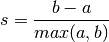



*The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.*

In [8]:
model.labels_

array([10,  0,  0, ...,  6,  6,  6], dtype=int32)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

score = silhouette_score(data, model.labels_, metric='euclidean')

In [ ]:
print('Silhouetter Score: %.3f' % score)

In [ ]:
% pip install yellowbrick

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)

# **Dunn’s Index**
*Dunn’s Index (DI) is another metric for evaluating a clustering algorithm. Dunn’s Index is equal to the minimum inter-cluster distance divided by the maximum cluster size. Note that large inter-cluster distances (better separation) and smaller cluster sizes (more compact clusters) lead to a higher DI value. A higher DI implies better clustering. It assumes that better clustering means that clusters are compact and well-separated from other clusters.*

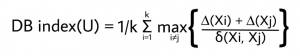

where, 

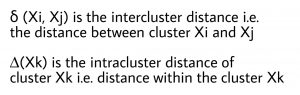

**A higher value is better.**

In [ ]:
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(data, model.labels_))
